# Plotting pupillometric data for exploration

It is crucial to validate preprocessing steps by visually inspecting the results using plots. Therefore, `pypillometry` implements several plotting facilities that encourage active exploration of the dataset. Some of the plotting functions require a Jupyter-notebook with enable widgets (see Installation instructions) so that the plots can be changed interactively, others are purely :mod:`matplotlib`-based.

In [4]:
import sys
sys.path.insert(0,"..")
import pypillometry as pp
import pylab as plt ## access matplotlib functions

d=pp.PupilData.from_file("../data/test.pd")
d2=pp.create_fake_pupildata(ntrials=20)

Each `PupilData` object has a default `plot()` function that, by default, plots the complete signal at once. 

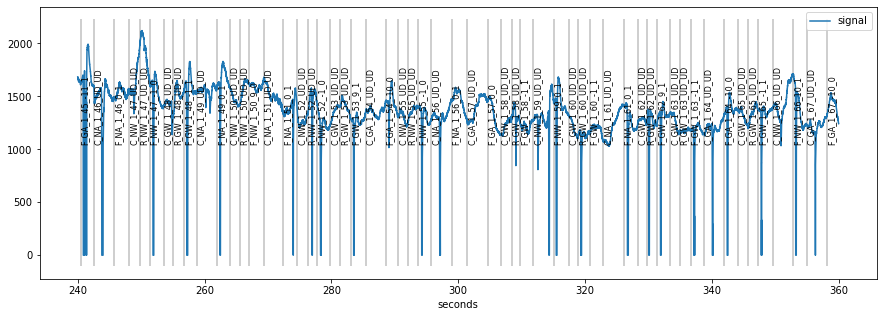

In [6]:
plt.figure(figsize=(15,5))
d.plot()

Often, the signal is too long to fit comfortably into one plot, therefore plot allows to specify a range by specifying the `plot_range=` argument with a `tuple` giving start end end of the plot. For longer recordings, it can be useful to specify the range in different time units by using `units=`. `pypillometry` supports `ms` (milliseconds), `sec` (seconds), `min` (minutes) and `h` (hours).

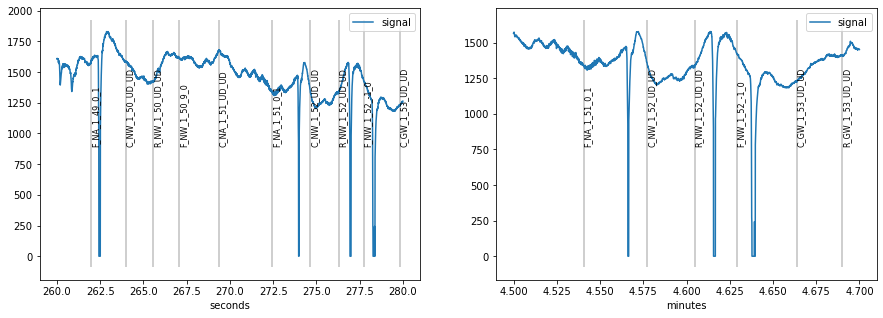

In [21]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
d.plot((260, 280), units="sec")
plt.subplot(1,2,2)
d.plot((4.5, 4.7), units="min")

Note that the scale of the plots went all the way to zero because missing data is represented by `0` in the used eyetracker. 

When we detect and interpolate blinks (see [blinks-notebook](/docs/html/docs/blinks.html)), the scale is adjusted and detected blinks highlighted in red.

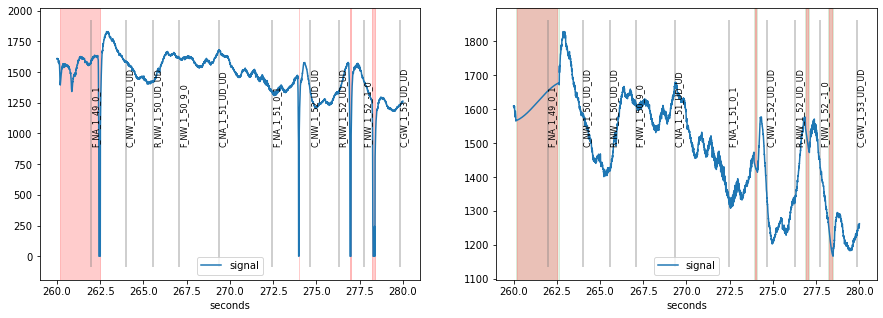

In [27]:
## detect and interpolate blinks
d=d.blinks_detect()
d2=d.blinks_interp_mahot()

## plot results
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
d.plot((260, 280), units="sec")
plt.subplot(1,2,2)
d2.plot((260, 280), units="sec")